# Hopfield Network

A Hopfield network is a type of **recurrent artificial neural network** used for associative memory and pattern recognition. It consists of **binary neurons** that are fully connected to each other in a symmetric fashion, with **no self-connections**.

### **1. Network State**
Each neuron in the network has a binary state:
$$ s_i \in \{-1, 1\}, \quad i = 1, 2, \dots, N $$

where:
- $s_i = 1$ means the neuron is active (ON),
- $s_i = -1$ means the neuron is inactive (OFF).

### **2. Weight Matrix**
The network learns patterns by storing them in a **weight matrix** W:
$$ W_{ij} = \frac{1}{N} \sum_{\mu=1}^{P} \xi_i^\mu \xi_j^\mu, \quad W_{ii} = 0 $$

where:
- $P$ is the number of stored patterns,
- $\xi^\mu$ is the **μ-th pattern** (a vector of -1 and 1),
- $W_{ij}$ is the weight between neurons $i$ and $j$,
- $W_{ii} = 0$ ensures no self-connections.

### **3. Update Rule**
The neuron states are updated asynchronously using the **Hebbian learning rule**:
$$ s_i(t+1) = \text{sign} \left( \sum_{j} W_{ij} s_j(t) \right) $$

where:
- The sign function is:
  $$ \text{sign}(x) = \begin{cases} 
  1, & x \geq 0 \\ 
  -1, & x < 0 
  \end{cases} $$

### **4. Energy Function**
Hopfield networks minimize an energy function:
$$ E = -\frac{1}{2} \sum_{i} \sum_{j} W_{ij} s_i s_j $$

which ensures convergence to a stored pattern.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class HopfieldNetwork:
    def __init__(self, num_neurons):
        self.num_neurons = num_neurons
        self.weights = np.zeros((num_neurons, num_neurons))

    def train(self, patterns):
        """Train network using Hebbian learning."""
        num_patterns = len(patterns)
        for p in patterns:
            self.weights += np.outer(p, p)  # Outer product Hebbian rule
        self.weights /= num_patterns
        np.fill_diagonal(self.weights, 0)  # No self-connections

    def update(self, state):
        """Asynchronously update the network state."""
        for _ in range(self.num_neurons):  
            i = np.random.randint(0, self.num_neurons)
            raw_input = np.dot(self.weights[i], state)
            state[i] = 1 if raw_input >= 0 else -1  # Sign activation
        return state

    def recall(self, pattern, steps=10):
        """Recalls a pattern over multiple steps."""
        state = pattern.copy()
        for _ in range(steps):
            state = self.update(state)
        return state

    def visualize_pattern(self, pattern, title="Pattern"):
        """Visualizes a pattern as a 2D grid."""
        side_length = int(np.sqrt(len(pattern)))  # Assume square images
        plt.imshow(pattern.reshape(side_length, side_length), cmap="gray")
        plt.title(title)
        plt.axis("off")
        plt.show()

In [9]:
from PIL import Image

def preprocess_image(image_path, size=(128, 128)):
    """Convert an image to a binary (-1,1) format for the Hopfield network."""
    img = Image.open(image_path).convert("L")  # Convert to grayscale
    img = img.resize(size)  # Resize image
    img_array = np.array(img)

    # Convert grayscale to binary (-1,1)
    binary_image = np.where(img_array > 128, 1, -1)
    return binary_image.flatten()

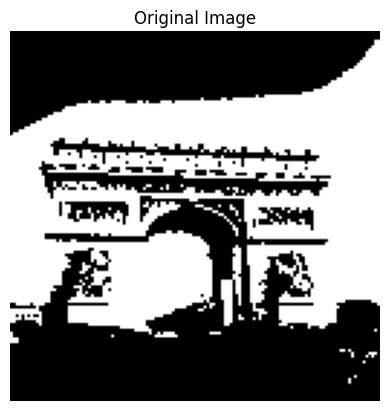

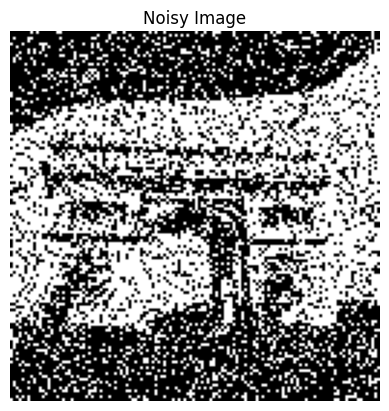

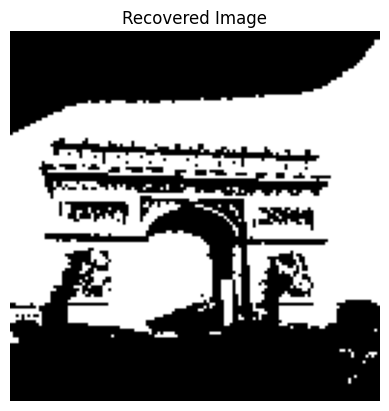

In [10]:
image_path = "/Users/elizabeth/Desktop/pics/websiteJPG/IMG_4436.jpg" # arc de triomphe
binary_pattern = preprocess_image(image_path)

hopfield = HopfieldNetwork(num_neurons=binary_pattern.shape[0])
hopfield.train([binary_pattern])

# Create a noisy version of the image
noisy_pattern = binary_pattern.copy()
noise_level = 0.2  # 20% noise
num_noisy_pixels = int(noise_level * noisy_pattern.shape[0])
random_indices = np.random.choice(noisy_pattern.shape[0], num_noisy_pixels, replace=False)
noisy_pattern[random_indices] *= -1  # Flip pixel values

# Recall the image
recovered_pattern = hopfield.recall(noisy_pattern, steps=10)

hopfield.visualize_pattern(binary_pattern, title="Original Image")
hopfield.visualize_pattern(noisy_pattern, title="Noisy Image")
hopfield.visualize_pattern(recovered_pattern, title="Recovered Image")

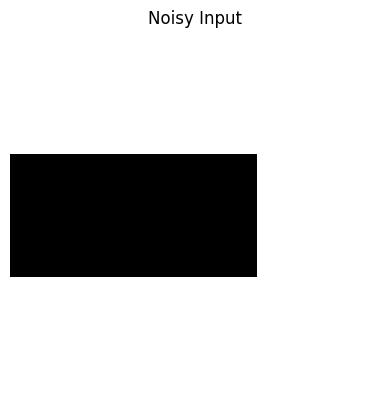

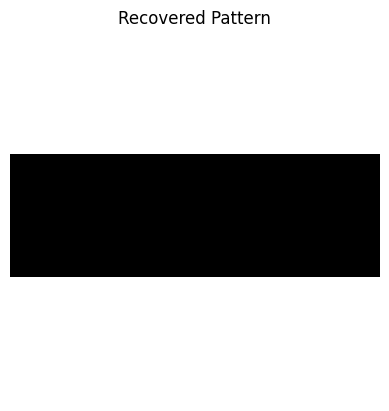

In [2]:
# basic example
if __name__ == "__main__":
    patterns = np.array([
        [1, 1, 1, -1, -1, -1, 1, 1, 1],  # Horizontal bar
        [1, -1, 1, 1, -1, 1, 1, -1, 1]   # Vertical bar
    ])

    hopfield = HopfieldNetwork(num_neurons=9)
    hopfield.train(patterns)

    test_pattern = np.array([1, 1, 1, -1, -1, 1, 1, 1, 1])  # Slightly corrupted

    recovered_pattern = hopfield.recall(test_pattern, steps=5)

    hopfield.visualize_pattern(test_pattern, title="Noisy Input")
    hopfield.visualize_pattern(recovered_pattern, title="Recovered Pattern")